/home/sam/dummyenv/my_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sam/dummyenv/my_env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


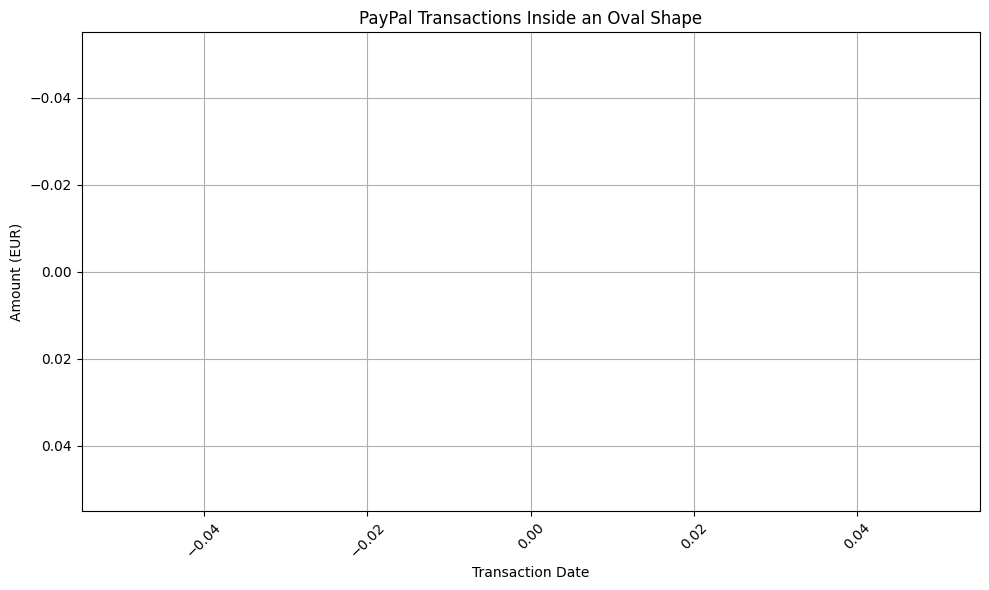

In [2]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

# Load transaction data from JSON
with open("generated_transactions.json", "r") as json_file:
    data = json.load(json_file)

# Extract PayPal transactions
paypal_transactions = [transaction for transaction in data["Transactions"] if
                      transaction["BankTransactionCode"]["Proprietary"]["Code"] == "PayPal"]

# Extract transaction dates and amounts for PayPal transactions
paypal_transaction_dates = [datetime.strptime(transaction["ValueDateTime"], "%Y-%m-%dT%H:%M:%S.%f") for transaction in paypal_transactions]
paypal_transaction_amounts = [float(transaction["Amount"]) for transaction in paypal_transactions]

# Create a scatter plot for PayPal transactions
plt.figure(figsize=(10, 6))

# Draw an ellipse boundary
ellipse = plt.Circle((np.mean(paypal_transaction_dates), np.mean(paypal_transaction_amounts)), 200, fill=False, color='r')
plt.gca().add_patch(ellipse)

# Scatter plot for PayPal transactions
plt.scatter(paypal_transaction_dates, paypal_transaction_amounts, c='b', alpha=0.5)

plt.title("PayPal Transactions Inside an Oval Shape")
plt.xlabel("Transaction Date")
plt.ylabel("Amount (EUR)")
plt.grid(True)
plt.gca().invert_yaxis()  # Invert the y-axis to show recent dates at the top
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
import json
from faker import Faker
from datetime import datetime, timedelta
import random

# Initialize Faker with a fixed seed for consistent results
fake = Faker()
Faker.seed(0)

# Initialize data structure
data = {
    "AccountId": "178012",
    "Transactions": []
}

# Define constants
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 6, 30)
salary_amount = 4000.00  # Consistent monthly salary
num_transactions = 1000
paypal_percentage = 0.2  # 2% of transactions are PayPal

# Generate transactions
for _ in range(num_transactions):
    transaction_date = fake.date_time_between(start_date, end_date, tzinfo=None)
    transaction_type = "SalaryPayment" if random.random() > paypal_percentage else "EcommerceRefund"
    
    if transaction_type == "EcommerceRefund" and random.random() > 0.2:
        transaction_type = "SalaryPayment"  # Ensure consistent salary in most cases
    
    transaction_amount = salary_amount if transaction_type == "SalaryPayment" else round(random.uniform(10, 500), 2)
    
    transaction = {
        "TransactionId": fake.uuid4(),
        "Amount": str(transaction_amount),
        "Currency": "EUR",
        "CreditDebitIndicator": "CRDT" if transaction_type == "SalaryPayment" else "DBIT",
        "Status": "BOOK",
        "BookingDateTime": transaction_date.isoformat(),
        "ValueDateTime": transaction_date.isoformat(),
        "RemittanceInformationUnstructured": fake.sentence(),
        "BankTransactionCode": {
            "Domain": {
                "DomainCode": "PMNT",
                "FamilyCode": "RCDT",
                "SubCode": "SALA"
            },
            "Proprietary": {
                "Code": "PayPal" if transaction_type == "SalaryPayment" else transaction_type,
                "Issuer": "BG"
            }
        },
        "CreditorAgent": {
            "Identification": fake.uuid4()
        },
        "CreditorAccount": {
            "Identification": fake.iban(),
            "SchemeName": "IBAN",
            "Name": fake.company(),
            "Currency": "EUR"
        },
        "DebtorAgent": {
            "Identification": fake.uuid4()
        },
        "DebtorAccount": {
            "Identification": fake.iban(),
            "SchemeName": "IBAN",
            "Name": fake.company(),
            "Currency": "EUR"
        },
        "PurposeCode": "SALA",
        "RemittanceInformationStructured": {
            "Reference": fake.ean8(),
            "Type": "SCOR",
            "Issuer": "ISO"
        },
        "References": {
            "EndToEndId": fake.uuid4(),
            "MandateId": fake.uuid4(),
            "ChequeNumber": fake.random_int(1000, 9999),
            "TransactionReference": fake.date_time_this_month().strftime("%Y%m%d-%H%M%S")
        },
        "RelatedParties": {
            "CreditorId": fake.uuid4(),
            "UltimateCreditor": fake.company(),
            "UltimateDebtor": fake.company()
        }
    }
    
    data["Transactions"].append(transaction)

# Save the generated transactions to a JSON file
with open("generated_transactions1.json", "w") as json_file:
    json.dump(data, json_file, indent=4)

print(f"Generated {num_transactions} transactions in 'generated_transactions1.json'.")


Generated 1000 transactions in 'generated_transactions.json'.


In [7]:
import json
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from matplotlib.patches import Ellipse

# Load transaction data from JSON
with open("generated_transactions1.json", "r") as json_file:
    data = json.load(json_file)

# Extract all transactions and PayPal transactions
all_transactions = data["Transactions"]
paypal_transactions = [transaction for transaction in all_transactions if
                      transaction["BankTransactionCode"]["Proprietary"]["Code"] == "PayPal"]

# Extract transaction dates and amounts for all transactions
all_transaction_dates = [datetime.strptime(transaction["ValueDateTime"], "%Y-%m-%dT%H:%M:%S") for transaction in all_transactions]
all_transaction_amounts = [float(transaction["Amount"]) for transaction in all_transactions]

# Extract transaction dates and amounts for PayPal transactions
paypal_transaction_dates = [datetime.strptime(transaction["ValueDateTime"], "%Y-%m-%dT%H:%M:%S") for transaction in paypal_transactions]
paypal_transaction_amounts = [float(transaction["Amount"]) for transaction in paypal_transactions]

# Calculate the mean and standard deviation for date axis
date_values = [date.timestamp() for date in all_transaction_dates]
x_mean = np.mean(date_values)
x_std = np.std(date_values)

# Calculate the mean and standard deviation for amount axis
y_mean = np.mean(all_transaction_amounts)
y_std = np.std(all_transaction_amounts)

# Create a scatter plot for all transactions
plt.figure(figsize=(10, 6))

# Scatter plot for all transactions
plt.scatter(all_transaction_dates, all_transaction_amounts, c='b', alpha=0.5, label="All Transactions")

# Draw an oval shape around all transactions
ellipse = Ellipse((x_mean, y_mean), 2 * x_std, 2 * y_std, edgecolor='r', fc='None', lw=2, label="Oval Around All Transactions")
plt.gca().add_patch(ellipse)

# Scatter plot for PayPal transactions (shown in green)
plt.scatter(paypal_transaction_dates, paypal_transaction_amounts, c='g', alpha=0.5, label="PayPal Transactions")

plt.title("Transactions with Oval Enclosure")
plt.xlabel("Transaction Date")
plt.ylabel("Amount (EUR)")
plt.grid(True)
plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


ValueError: Date ordinal -84221333.55409986 converts to -228621-10-27T10:42:05.771776 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

Error in callback <function _draw_all_if_interactive at 0x7f2280871cf0> (for post_execute):


ValueError: Date ordinal -84221333.55409986 converts to -228621-10-27T10:42:05.771776 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

ValueError: Date ordinal -84221333.55409986 converts to -228621-10-27T10:42:05.771776 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 1000x600 with 1 Axes>

In [9]:
import json
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
from matplotlib.patches import Ellipse

# Load transaction data from JSON
with open("generated_transactions1.json", "r") as json_file:
    data = json.load(json_file)

# Extract all transactions and PayPal transactions
all_transactions = data["Transactions"]
paypal_transactions = [transaction for transaction in all_transactions if
                      transaction["BankTransactionCode"]["Proprietary"]["Code"] == "PayPal"]

# Extract transaction dates and amounts for all transactions
all_transaction_dates = [datetime.strptime(transaction["ValueDateTime"], "%Y-%m-%dT%H:%M:%S") for transaction in all_transactions]
all_transaction_amounts = [float(transaction["Amount"]) for transaction in all_transactions]

# Extract transaction dates and amounts for PayPal transactions
paypal_transaction_dates = [datetime.strptime(transaction["ValueDateTime"], "%Y-%m-%dT%H:%M:%S") for transaction in paypal_transactions]
paypal_transaction_amounts = [float(transaction["Amount"]) for transaction in paypal_transactions]

# Calculate the mean and standard deviation for date axis
date_values = [(date - datetime(1, 1, 1)).total_seconds() for date in all_transaction_dates]  # Convert to seconds
x_mean = np.mean(date_values)
x_std = np.std(date_values)

# Calculate the mean and standard deviation for amount axis
y_mean = np.mean(all_transaction_amounts)
y_std = np.std(all_transaction_amounts)

# Create a scatter plot for all transactions
plt.figure(figsize=(10, 6))

# Scatter plot for all transactions
plt.scatter(all_transaction_dates, all_transaction_amounts, c='b', alpha=0.5, label="All Transactions")

# Draw an oval shape around all transactions
ellipse = Ellipse((x_mean, y_mean), 2 * x_std, 2 * y_std, edgecolor='r', fc='None', lw=2, label="Oval Around All Transactions")
plt.gca().add_patch(ellipse)

# Scatter plot for PayPal transactions (shown in green)
plt.scatter(paypal_transaction_dates, paypal_transaction_amounts, c='g', alpha=0.5, label="PayPal Transactions")

plt.title("Transactions with Oval Enclosure")
plt.xlabel("Transaction Date")
plt.ylabel("Amount (EUR)")
plt.grid(True)
plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


OverflowError: int too big to convert

Error in callback <function _draw_all_if_interactive at 0x7f2280871cf0> (for post_execute):


OverflowError: int too big to convert

OverflowError: int too big to convert

<Figure size 1000x600 with 1 Axes>

/home/sam/dummyenv/my_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/sam/dummyenv/my_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


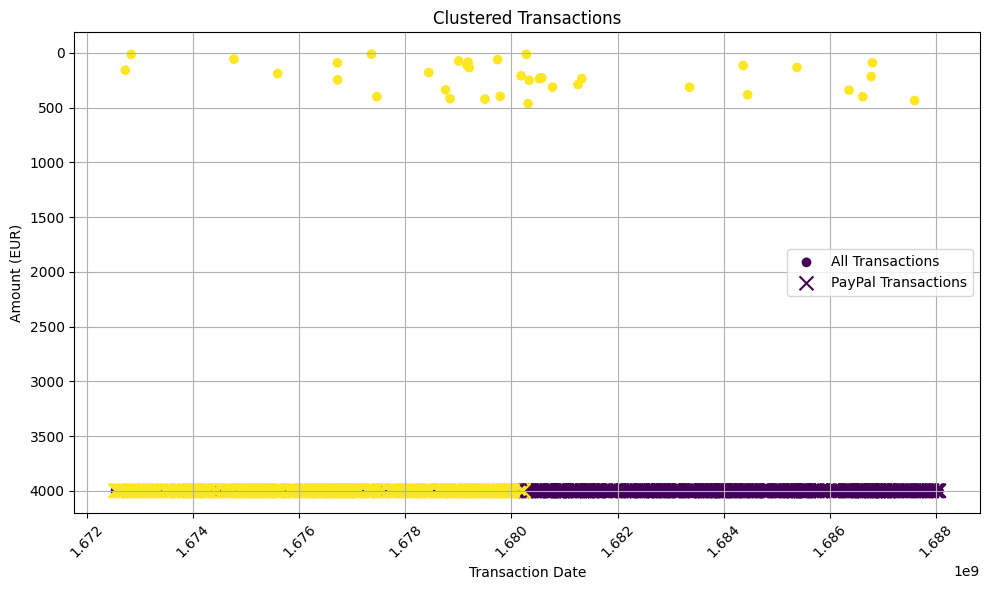

In [11]:
import json
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load transaction data from JSON
with open("generated_transactions1.json", "r") as json_file:
    data = json.load(json_file)

# Extract all transactions and PayPal transactions
all_transactions = data["Transactions"]
paypal_transactions = [transaction for transaction in all_transactions if
                      transaction["BankTransactionCode"]["Proprietary"]["Code"] == "PayPal"]

# Extract transaction dates and amounts for all transactions
all_transaction_dates = [datetime.strptime(transaction["ValueDateTime"], "%Y-%m-%dT%H:%M:%S") for transaction in all_transactions]
all_transaction_amounts = [float(transaction["Amount"]) for transaction in all_transactions]

# Extract transaction dates and amounts for PayPal transactions
paypal_transaction_dates = [datetime.strptime(transaction["ValueDateTime"], "%Y-%m-%dT%H:%M:%S") for transaction in paypal_transactions]
paypal_transaction_amounts = [float(transaction["Amount"]) for transaction in paypal_transactions]

# Prepare the data for clustering
X_all = [[date.timestamp(), amount] for date, amount in zip(all_transaction_dates, all_transaction_amounts)]
X_paypal = [[date.timestamp(), amount] for date, amount in zip(paypal_transaction_dates, paypal_transaction_amounts)]

# Standardize the data
scaler = StandardScaler()
X_all = scaler.fit_transform(X_all)
X_paypal = scaler.transform(X_paypal)

# Perform clustering using K-Means
n_clusters = 2
kmeans_all = KMeans(n_clusters=n_clusters).fit(X_all)
kmeans_paypal = KMeans(n_clusters=n_clusters).fit(X_paypal)

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Scatter plot for all transactions
plt.scatter([date.timestamp() for date in all_transaction_dates], all_transaction_amounts, c=kmeans_all.labels_, cmap='viridis', label="All Transactions")

# Scatter plot for PayPal transactions
plt.scatter([date.timestamp() for date in paypal_transaction_dates], paypal_transaction_amounts, c=kmeans_paypal.labels_, cmap='viridis', marker='x', s=100, label="PayPal Transactions")

plt.title("Clustered Transactions")
plt.xlabel("Transaction Date")
plt.ylabel("Amount (EUR)")
plt.grid(True)
plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


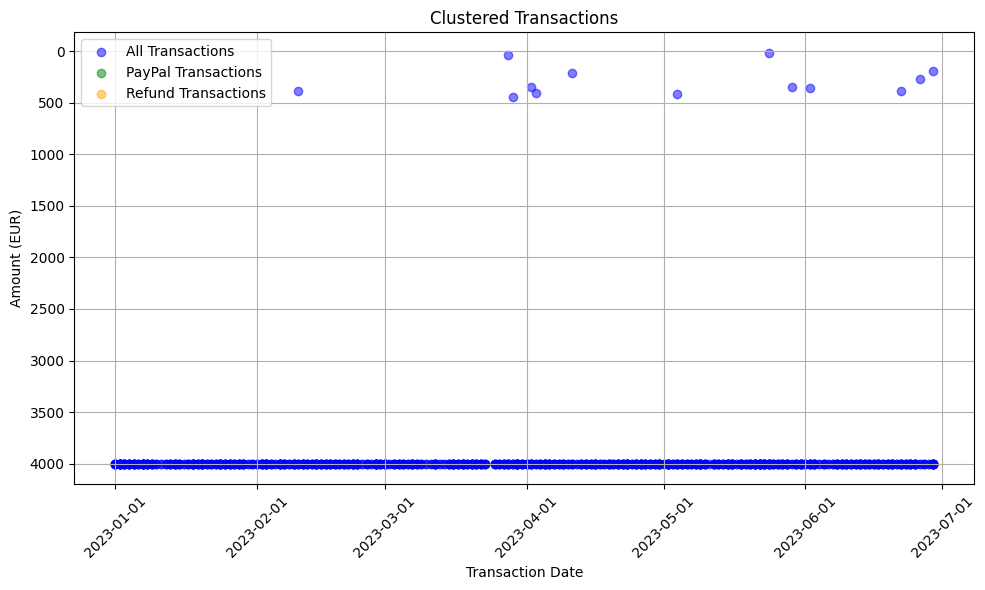

In [15]:
import json
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter

# Load transaction data from JSON
with open("generated_transactions.json", "r") as json_file:
    data = json.load(json_file)

# Extract all transactions, PayPal transactions, and other refund transactions
all_transactions = data["Transactions"]
paypal_transactions = [transaction for transaction in all_transactions if
                      transaction["BankTransactionCode"]["Proprietary"]["Code"] == "PayPal"]
refund_transactions = [transaction for transaction in all_transactions if
                       transaction["BankTransactionCode"]["Proprietary"]["Code"] == "Refund"]

# Extract transaction dates and amounts for all transactions
all_transaction_dates = [datetime.strptime(transaction["ValueDateTime"], "%Y-%m-%dT%H:%M:%S") for transaction in all_transactions]
all_transaction_amounts = [float(transaction["Amount"]) for transaction in all_transactions]

# Extract transaction dates and amounts for PayPal transactions
paypal_transaction_dates = [datetime.strptime(transaction["ValueDateTime"], "%Y-%m-%dT%H:%M:%S") for transaction in paypal_transactions]
paypal_transaction_amounts = [float(transaction["Amount"]) for transaction in paypal_transactions]

# Extract transaction dates and amounts for other refund transactions
refund_transaction_dates = [datetime.strptime(transaction["ValueDateTime"], "%Y-%m-%dT%H:%M:%S") for transaction in refund_transactions]
refund_transaction_amounts = [float(transaction["Amount"]) for transaction in refund_transactions]

# Extract only the date part from transaction dates
all_transaction_dates = [date.date() for date in all_transaction_dates]
paypal_transaction_dates = [date.date() for date in paypal_transaction_dates]
refund_transaction_dates = [date.date() for date in refund_transaction_dates]

# Create a scatter plot for all transactions
plt.figure(figsize=(10, 6))

# Scatter plot for all transactions
plt.scatter(all_transaction_dates, all_transaction_amounts, c='b', alpha=0.5, label="All Transactions")

# Scatter plot for PayPal transactions (shown in green)
plt.scatter(paypal_transaction_dates, paypal_transaction_amounts, c='g', alpha=0.5, label="PayPal Transactions")

# Scatter plot for other refund transactions (shown in orange)
plt.scatter(refund_transaction_dates, refund_transaction_amounts, c='orange', alpha=0.5, label="Refund Transactions")

plt.title("Clustered Transactions")
plt.xlabel("Transaction Date")
plt.ylabel("Amount (EUR)")
plt.grid(True)
plt.gca().invert_yaxis()
plt.xticks(rotation=45)

# Set the x-axis date format to show only the date part
date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)

plt.legend()
plt.tight_layout()
plt.show()


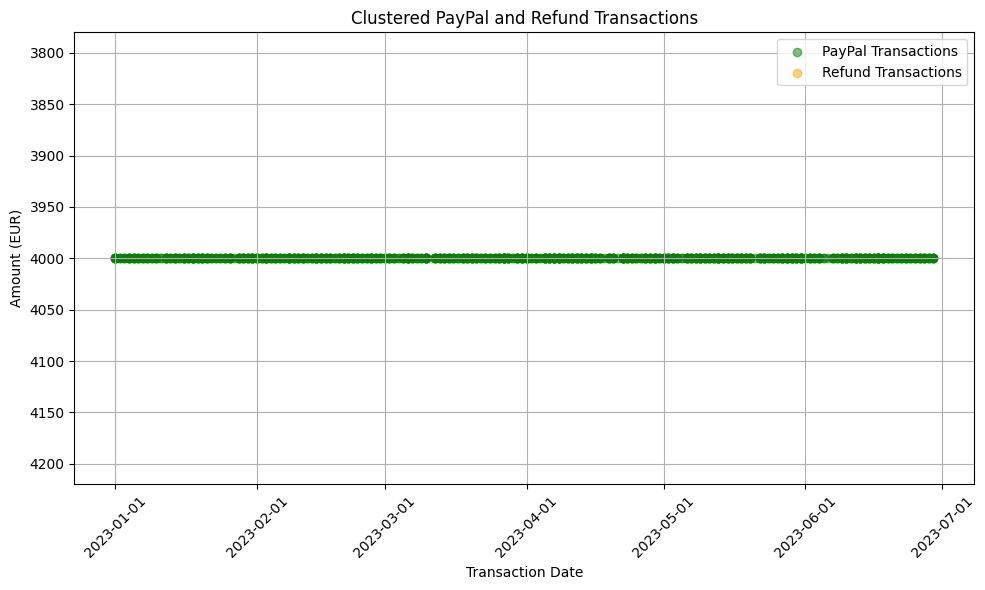

In [17]:
import json
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter

# Load transaction data from JSON
with open("generated_transactions1.json", "r") as json_file:
    data = json.load(json_file)

# Extract PayPal transactions and refund transactions
paypal_transactions = [transaction for transaction in data["Transactions"] if
                      transaction["BankTransactionCode"]["Proprietary"]["Code"] == "PayPal"]
refund_transactions = [transaction for transaction in data["Transactions"] if
                       transaction["BankTransactionCode"]["Proprietary"]["Code"] == "Refund"]

# Extract transaction dates and amounts for PayPal transactions
paypal_transaction_dates = [datetime.strptime(transaction["ValueDateTime"], "%Y-%m-%dT%H:%M:%S") for transaction in paypal_transactions]
paypal_transaction_amounts = [float(transaction["Amount"]) for transaction in paypal_transactions]

# Extract transaction dates and amounts for refund transactions
refund_transaction_dates = [datetime.strptime(transaction["ValueDateTime"], "%Y-%m-%dT%H:%M:%S") for transaction in refund_transactions]
refund_transaction_amounts = [float(transaction["Amount"]) for transaction in refund_transactions]

# Extract only the date part from transaction dates
paypal_transaction_dates = [date.date() for date in paypal_transaction_dates]
refund_transaction_dates = [date.date() for date in refund_transaction_dates]

# Create a scatter plot for PayPal transactions
plt.figure(figsize=(10, 6))

# Scatter plot for PayPal transactions (shown in green)
plt.scatter(paypal_transaction_dates, paypal_transaction_amounts, c='g', alpha=0.5, label="PayPal Transactions")

# Scatter plot for refund transactions (shown in orange)
plt.scatter(refund_transaction_dates, refund_transaction_amounts, c='orange', alpha=0.5, label="Refund Transactions")

plt.title("Clustered PayPal and Refund Transactions")
plt.xlabel("Transaction Date")
plt.ylabel("Amount (EUR)")
plt.grid(True)
plt.gca().invert_yaxis()
plt.xticks(rotation=45)

# Set the x-axis date format to show only the date part
date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)

plt.legend()
plt.tight_layout()
plt.show()


In [1]:
import json
from faker import Faker
from datetime import datetime, timedelta
import random

fake = Faker()

# Initialize data structure
data = {
    "AccountId": "178012",
    "Transactions": []
}

# Generate consistent salary income for 6 months
for i in range(6):
    salary_transaction = {
        "TransactionId": fake.uuid4(),
        "Amount": "4000.00",
        "Currency": "EUR",
        "CreditDebitIndicator": "CRDT",
        "Status": "BOOK",
        "BookingDateTime": (datetime.now() - timedelta(days=30 * i)).strftime("%Y-%m-%dT%H:%M:%SZ"),
        "ValueDateTime": (datetime.now() - timedelta(days=30 * i)).strftime("%Y-%m-%dT%H:%M:%SZ"),
        "RemittanceInformationUnstructured": f"Salary for Month {i + 1}",
        "BankTransactionCode": {
            "Domain": {
                "DomainCode": "PMNT",
                "FamilyCode": "RCDT",
                "SubCode": "SALA"
            },
            "Proprietary": {
                "Code": "SalaryPayment",
                "Issuer": "BG"
            }
        },
        "CreditorAgent": {
            "Identification": "creditor_agent_identification"
        },
        "CreditorAccount": {
            "Identification": "DE78900900424711121212",
            "SchemeName": "IBAN",
            "Name": "Hansi Meier",
            "Currency": "EUR"
        },
        "DebtorAgent": {
            "Identification": "debtor_agent_identification"
        },
        "DebtorAccount": {
            "Identification": "DE87123456781234567891",
            "SchemeName": "IBAN",
            "Name": "Elias Book Store",
            "Currency": "EUR"
        },
        "PurposeCode": "SALA",
        "RemittanceInformationStructured": {
            "Reference": f"RF{fake.random_number(10)}",
            "Type": "SCOR",
            "Issuer": "ISO"
        },
        "References": {
            "EndToEndId": fake.uuid4(),
            "MandateId": fake.uuid4(),
            "ChequeNumber": f"check{i + 1}",
            "TransactionReference": f"{datetime.now().strftime('%Y%m%d')}-{i + 1}"
        },
        "RelatedParties": {
            "CreditorId": f"creditor{i + 1}",
            "UltimateCreditor": f"Hansi Meier {i + 1} U",
            "UltimateDebtor": "Elias Book Store U"
        }
    }
    data["Transactions"].append(salary_transaction)

# Generate 10 PayPal transactions
for _ in range(10):
    paypal_transaction = {
        "TransactionId": fake.uuid4(),
        "Amount": f"{fake.random_int(min=10, max=100)}.00",
        "Currency": "EUR",
        "CreditDebitIndicator": "CRDT",
        "Status": "BOOK",
        "BookingDateTime": fake.date_time_this_decade().strftime("%Y-%m-%dT%H:%M:%SZ"),
        "ValueDateTime": fake.date_time_this_decade().strftime("%Y-%m-%dT%H:%M:%SZ"),
        "RemittanceInformationUnstructured": "PayPal Payment",
        "BankTransactionCode": {
            "Domain": {
                "DomainCode": "PMNT",
                "FamilyCode": "RCPT",
                "SubCode": "PAYP"
            },
            "Proprietary": {
                "Code": "PayPalPayment",
                "Issuer": "PayPal"
            }
        },
        "CreditorAgent": {
            "Identification": "paypal_creditor_agent"
        },
        "CreditorAccount": {
            "Identification": "paypal@example.com",
            "SchemeName": "PayPal",
            "Name": "PayPal Account",
            "Currency": "EUR"
        },
        "DebtorAgent": {
            "Identification": "debtor_agent_identification"
        },
        "DebtorAccount": {
            "Identification": "DE87123456781234567891",
            "SchemeName": "IBAN",
            "Name": "Elias Book Store",
            "Currency": "EUR"
        },
        "PurposeCode": "PAYP",
        "RemittanceInformationStructured": {
            "Reference": f"RF{fake.random_number(10)}",
            "Type": "SCOR",
            "Issuer": "ISO"
        },
        "References": {
            "EndToEndId": fake.uuid4(),
            "MandateId": fake.uuid4(),
            "ChequeNumber": f"check{fake.random_number(3)}",
            "TransactionReference": f"{datetime.now().strftime('%Y%m%d')}-PAYP"
        },
        "RelatedParties": {
            "CreditorId": "paypal_creditor",
            "UltimateCreditor": "PayPal U",
            "UltimateDebtor": "Elias Book Store U"
        }
    }
    data["Transactions"].append(paypal_transaction)

# Generate 1 cancelled transaction
cancelled_transaction = {
    "TransactionId": fake.uuid4(),
    "Amount": "50.00",
    "Currency": "EUR",
    "CreditDebitIndicator": "DBIT",
    "Status": "CANCELLED",
    "BookingDateTime": fake.date_time_this_decade().strftime("%Y-%m-%dT%H:%M:%SZ"),
    "ValueDateTime": fake.date_time_this_decade().strftime("%Y-%m-%dT%H:%M:%SZ"),
    "RemittanceInformationUnstructured": "Cancelled Transaction",
    "BankTransactionCode": {
        "Domain": {
            "DomainCode": "PMNT",
            "FamilyCode": "RCPT",
            "SubCode": "OTHR"
        },
        "Proprietary": {
            "Code": "CancelledTransaction",
            "Issuer": "Bank"
        }
    },
    "CreditorAgent": {
        "Identification": "creditor_agent_identification"
    },
    "CreditorAccount": {
        "Identification": "DE78900900424711121212",
        "SchemeName": "IBAN",
        "Name": "Hansi Meier",
        "Currency": "EUR"
    },
    "DebtorAgent": {
        "Identification": "debtor_agent_identification"
    },
    "DebtorAccount": {
        "Identification": "DE87123456781234567891",
        "SchemeName": "IBAN",
        "Name": "Elias Book Store",
        "Currency": "EUR"
    },
    "PurposeCode": "OTHR",
    "RemittanceInformationStructured": {
        "Reference": f"RF{fake.random_number(10)}",
        "Type": "SCOR",
        "Issuer": "ISO"
    },
    "References": {
        "EndToEndId": fake.uuid4(),
    "MandateId": fake.uuid4(),
    "ChequeNumber": f"check{fake.random_number(3)}",
    "TransactionReference": f"{datetime.now().strftime('%Y%m%d')}-CANCELLED"
    },
    "RelatedParties": {
        "CreditorId": "creditor_cancelled",
        "UltimateCreditor": "Hansi Meier Cancelled U",
        "UltimateDebtor": "Elias Book Store U"
    }
}

# Append the cancelled transaction to the data
data["Transactions"].append(cancelled_transaction)

# Save the generated transactions to a JSON file
with open("generated_transactions.json", "w") as json_file:
    json.dump(data, json_file, indent=2)

print("Generated transactions saved to generated_transactions.json")


Generated transactions saved to generated_transactions.json


In [2]:
import json

# Load transactions from the JSON file
with open("generated_transactions.json", "r") as json_file:
    data = json.load(json_file)

# Initialize trust index
trust_index = 0

salary_transactions = [transaction for transaction in data["Transactions"] if
                        transaction["BankTransactionCode"]["Proprietary"]["Code"] == "SalaryPayment"]
if len(salary_transactions) == 6:
    trust_index += 11


paypal_transactions = [transaction for transaction in data["Transactions"] if
                       transaction["BankTransactionCode"]["Proprietary"]["Code"] == "PayPalPayment"]
paypal_percentage = (len(paypal_transactions) / len(data["Transactions"])) * 100
if paypal_percentage <= 10:
    trust_index += 11

cancelled_transactions = [transaction for transaction in data["Transactions"] if
                           transaction["Status"] == "CANCELLED"]
cancelled_percentage = (len(cancelled_transactions) / len(data["Transactions"])) * 100
if cancelled_percentage <= 10:
    trust_index += 11

# Ensure trust index does not exceed 99
trust_index = min(trust_index, 99)

print(f"Trust Index: {trust_index}%")


Trust Index: 22%


In [4]:
import json

with open("generated_transactions.json", "r") as json_file:
    data = json.load(json_file)

trust_index = 0

salary_transactions = [transaction for transaction in data["Transactions"] if
                        transaction["BankTransactionCode"]["Proprietary"]["Code"] == "SalaryPayment"]
if len(salary_transactions) == 6:
    trust_index += 11

paypal_transactions = [transaction for transaction in data["Transactions"] if
                       transaction["BankTransactionCode"]["Proprietary"]["Code"] == "PayPalPayment"]
paypal_percentage = (len(paypal_transactions) / len(data["Transactions"])) * 100
if paypal_percentage <= 10:
    trust_index += 11

cancelled_transactions = [transaction for transaction in data["Transactions"] if
                           transaction["Status"] == "CANCELLED"]
cancelled_percentage = (len(cancelled_transactions) / len(data["Transactions"])) * 100
if cancelled_percentage <= 10:
    trust_index += 11

# Ensure trust index does not exceed 99
trust_index = min(trust_index, 99)

print(f"Trust Index: {trust_index}%")

print("\nSalary Transactions:")
for transaction in salary_transactions:
    print(f"Date: {transaction['ValueDateTime']}, Proprietary Code: {transaction['BankTransactionCode']['Proprietary']['Code']}, Amount: {transaction['Amount']}")

print("\nPayPal Transactions:")
for transaction in paypal_transactions:
    print(f"Date: {transaction['ValueDateTime']}, Proprietary Code: {transaction['BankTransactionCode']['Proprietary']['Code']}, Amount: {transaction['Amount']}")

print("\nCancelled Transactions:")
for transaction in cancelled_transactions:
    print(f"Date: {transaction['ValueDateTime']}, Proprietary Code: {transaction['BankTransactionCode']['Proprietary']['Code']}, Amount: {transaction['Amount']}")



Trust Index: 22%

Salary Transactions:
Date: 2023-11-09T11:21:08Z, Proprietary Code: SalaryPayment, Amount: 4000.00
Date: 2023-10-10T11:21:08Z, Proprietary Code: SalaryPayment, Amount: 4000.00
Date: 2023-09-10T11:21:08Z, Proprietary Code: SalaryPayment, Amount: 4000.00
Date: 2023-08-11T11:21:08Z, Proprietary Code: SalaryPayment, Amount: 4000.00
Date: 2023-07-12T11:21:08Z, Proprietary Code: SalaryPayment, Amount: 4000.00
Date: 2023-06-12T11:21:08Z, Proprietary Code: SalaryPayment, Amount: 4000.00

PayPal Transactions:
Date: 2022-06-09T13:59:38Z, Proprietary Code: PayPalPayment, Amount: 57.00
Date: 2020-12-26T06:00:24Z, Proprietary Code: PayPalPayment, Amount: 34.00
Date: 2020-12-04T09:55:11Z, Proprietary Code: PayPalPayment, Amount: 76.00
Date: 2022-12-16T23:31:19Z, Proprietary Code: PayPalPayment, Amount: 82.00
Date: 2022-05-30T12:10:11Z, Proprietary Code: PayPalPayment, Amount: 38.00
Date: 2022-08-22T04:18:35Z, Proprietary Code: PayPalPayment, Amount: 11.00
Date: 2022-05-19T09:51:39Z,

In [6]:
from faker import Faker
import json
from datetime import datetime, timedelta
import random

fake = Faker()

data = {
    "AccountId": "178012",
    "Transactions": []
}

for i in range(1, 7):
    salary_transaction = {
        "TransactionId": fake.uuid4(),
        "Amount": "4000.00",
        "Currency": "EUR",
        "CreditDebitIndicator": "CRDT",
        "Status": "BOOK",
        "BookingDateTime": f"2023-{i:02d}-21T00:00:00Z",
        "ValueDateTime": f"2023-{i:02d}-21T00:00:00Z",
        "RemittanceInformationUnstructured": f"Salary for month {i}",
        "BankTransactionCode": {
            "Domain": {
                "DomainCode": "PMNT",
                "FamilyCode": "RCDT",
                "SubCode": "SALA"
            },
            "Proprietary": {
                "Code": "SalaryPayment",
                "Issuer": "BG"
            }
        },
        "CreditorAgent": {
            "Identification": "creditor_agent_identification"
        },
        "CreditorAccount": {
            "Identification": "DE78900900424711121212",
            "SchemeName": "IBAN",
            "Name": "Hansi Meier",
            "Currency": "EUR"
        },
        "DebtorAgent": {
            "Identification": "debtor_agent_identification"
        },
        "DebtorAccount": {
            "Identification": "DE87123456781234567891",
            "SchemeName": "IBAN",
            "Name": "Elias Book Store",
            "Currency": "EUR"
        },
        "PurposeCode": "SALA",
        "RemittanceInformationStructured": {
            "Reference": f"RF{fake.random_number(15)}",
            "Type": "SCOR",
            "Issuer": "ISO"
        },
        "References": {
            "EndToEndId": fake.uuid4(),
            "MandateId": fake.uuid4(),
            "ChequeNumber": f"check{fake.random_number(3)}",
            "TransactionReference": f"2023{i:02d}21-{i:02d}001"
        },
        "RelatedParties": {
            "CreditorId": f"creditor{i}",
            "UltimateCreditor": f"Hansi Meier U {i}",
            "UltimateDebtor": "Elias Book Store U"
        }
    }
    data["Transactions"].append(salary_transaction)

for _ in range(10):
    paypal_transaction = {
        "TransactionId": fake.uuid4(),
        "Amount": f"{fake.random_int(min=10, max=100)}.00",
        "Currency": "EUR",
        "CreditDebitIndicator": "CRDT",
        "Status": "BOOK",
        "BookingDateTime": fake.date_time_this_decade().strftime("%Y-%m-%dT%H:%M:%SZ"),
        "ValueDateTime": fake.date_time_this_decade().strftime("%Y-%m-%dT%H:%M:%SZ"),
        "RemittanceInformationUnstructured": "PayPal Payment",
        "BankTransactionCode": {
            "Domain": {
                "DomainCode": "PMNT",
                "FamilyCode": "RCPT",
                "SubCode": "PAYP"
            },
            "Proprietary": {
                "Code": "PayPalPayment",
                "Issuer": "PayPal"
            }
        },
        "CreditorAgent": {
            "Identification": "paypal_creditor_agent"
        },
        "CreditorAccount": {
            "Identification": "paypal@example.com",
            "SchemeName": "PayPal",
            "Name": "PayPal Account",
            "Currency": "EUR"
        },
        "DebtorAgent": {
            "Identification": "debtor_agent_identification"
        },
        "DebtorAccount": {
            "Identification": "DE87123456781234567891",
            "SchemeName": "IBAN",
            "Name": "Elias Book Store",
            "Currency": "EUR"
        },
        "PurposeCode": "PAYP",
        "RemittanceInformationStructured": {
            "Reference": f"RF{fake.random_number(10)}",
            "Type": "SCOR",
            "Issuer": "ISO"
        },
        "References": {
            "EndToEndId": fake.uuid4(),
            "MandateId": fake.uuid4(),
            "ChequeNumber": f"check{fake.random_number(3)}",
            "TransactionReference": f"{datetime.now().strftime('%Y%m%d')}-PAYP"
        },
        "RelatedParties": {
            "CreditorId": "paypal_creditor",
            "UltimateCreditor": "PayPal U",
            "UltimateDebtor": "Elias Book Store U"
        }
    }
    data["Transactions"].append(paypal_transaction)

cancelled_transaction = {
    "TransactionId": fake.uuid4(),
    "Amount": "50.00",
    "Currency": "EUR",
    "CreditDebitIndicator": "DBIT",
    "Status": "CANCELLED",
    "BookingDateTime": fake.date_time_this_decade().strftime("%Y-%m-%dT%H:%M:%SZ"),
    "ValueDateTime": fake.date_time_this_decade().strftime("%Y-%m-%dT%H:%M:%SZ"),
    "RemittanceInformationUnstructured": "Cancelled Transaction",
    "BankTransactionCode": {
        "Domain": {
            "DomainCode": "PMNT",
            "FamilyCode": "RCPT",
            "SubCode": "OTHR"
        },
        "Proprietary": {
            "Code": "CancelledTransaction",
            "Issuer": "Bank"
        }
    },
    "CreditorAgent": {
        "Identification": "creditor_agent_identification"
    },
    "CreditorAccount": {
        "Identification": "DE78900900424711121212",
        "SchemeName": "IBAN",
        "Name": "Hansi Meier",
        "Currency": "EUR"
    },
    "DebtorAgent": {
        "Identification": "debtor_agent_identification"
    },
    "DebtorAccount": {
        "Identification": "DE87123456781234567891",
        "SchemeName": "IBAN",
        "Name": "Elias Book Store",
        "Currency": "EUR"
    },
    "PurposeCode": "OTHR",
    "RemittanceInformationStructured": {
        "Reference": f"RF{fake.random_number(10)}",
        "Type": "SCOR",
        "Issuer": "ISO"
    },
    "References": {
        "EndToEndId": fake.uuid4(),
    "MandateId": fake.uuid4(),
    "ChequeNumber": f"check{fake.random_number(3)}",
    "TransactionReference": f"{datetime.now().strftime('%Y%m%d')}-CANCELLED"
    },
    "RelatedParties": {
        "CreditorId": "creditor_cancelled",
        "UltimateCreditor": "Hansi Meier Cancelled U",
        "UltimateDebtor": "Elias Book Store U"
    }
}

data["Transactions"].append(cancelled_transaction)

for i in range(1, 6):
    amazon_purchase_transaction = {
        "TransactionId": fake.uuid4(),
        "Amount": f"{random.uniform(50, 500):.2f}",
        "Currency": "EUR",
        "CreditDebitIndicator": "DBIT",
        "Status": "BOOK",
        "BookingDateTime": f"2023-07-0{i}T12:00:00Z",
        "ValueDateTime": f"2023-07-0{i}T12:00:00Z",
        "RemittanceInformationUnstructured": f"Purchase from Amazon {i}",
        "BankTransactionCode": {
            "Domain": {
                "DomainCode": "PMNT",
                "FamilyCode": "RCDT",
                "SubCode": "GOOD"
            },
            "Proprietary": {
                "Code": "AmazonPayment",
                "Issuer": "Amazon"
            }
        },
        "CreditorAgent": {
            "Identification": "amazon_agent_identification"
        },
        "CreditorAccount": {
            "Identification": "AMZN123456789",
            "SchemeName": "AMZN_ACCOUNT",
            "Name": "Amazon",
            "Currency": "EUR"
        },
        "DebtorAgent": {
            "Identification": "debtor_agent_identification"
        },
        "DebtorAccount": {
            "Identification": "DE87123456781234567891",
            "SchemeName": "IBAN",
            "Name": "Elias Book Store",
            "Currency": "EUR"
        },
        "PurposeCode": "GOOD",
        "RemittanceInformationStructured": {
            "Reference": f"RF{fake.random_number(15)}",
            "Type": "SCOR",
            "Issuer": "ISO"
        },
        "References": {
            "EndToEndId": fake.uuid4(),
            "MandateId": fake.uuid4(),
            "ChequeNumber": f"check{fake.random_number(3)}",
            "TransactionReference": f"2023070{i}-AMZ00{i}"
        },
        "RelatedParties": {
            "CreditorId": "AMZ",
            "UltimateCreditor": "Amazon",
            "UltimateDebtor": "Elias Book Store U"
        }
    }
    data["Transactions"].append(amazon_purchase_transaction)

for i in range(1, 3):
    amazon_refund_transaction = {
        "TransactionId": fake.uuid4(),
        "Amount": f"{random.uniform(20, 100):.2f}",
        "Currency": "EUR",
        "CreditDebitIndicator": "CRDT",
        "Status": "BOOK",
        "BookingDateTime": f"2023-07-2{i}T12:00:00Z",
        "ValueDateTime": f"2023-07-2{i}T12:00:00Z",
        "RemittanceInformationUnstructured": f"Refund from Amazon {i}",
        "BankTransactionCode": {
            "Domain": {
                "DomainCode": "PMNT",
                "FamilyCode": "RCDT",
                "SubCode": "REFD"
            },
            "Proprietary": {
                "Code": "AmazonRefund",
                "Issuer": "Amazon"
            }
        },
        "CreditorAgent": {
            "Identification": "amazon_agent_identification"
        },
        "CreditorAccount": {
            "Identification": "AMZN123456789",
            "SchemeName": "AMZN_ACCOUNT",
            "Name": "Amazon",
            "Currency": "EUR"
        },
        "DebtorAgent": {
            "Identification": "debtor_agent_identification"
        },
        "DebtorAccount": {
            "Identification": "DE87123456781234567891",
            "SchemeName": "IBAN",
            "Name": "Elias Book Store",
            "Currency": "EUR"
        },
        "PurposeCode": "REFD",
        "RemittanceInformationStructured": {
            "Reference": f"RF{fake.random_number(15)}",
            "Type": "SCOR",
            "Issuer": "ISO"
        },
        "References": {
            "EndToEndId": fake.uuid4(),
            "MandateId": fake.uuid4(),
            "ChequeNumber": f"check{fake.random_number(3)}",
            "TransactionReference": f"2023072{i}-AMZ00{i}"
        },
        "RelatedParties": {
            "CreditorId": "AMZ",
            "UltimateCreditor": "Amazon",
            "UltimateDebtor": "Elias Book Store U"
        }
    }
    data["Transactions"].append(amazon_refund_transaction)

with open("generated_transactions_with_amazon.json", "w") as json_file:
    json.dump(data, json_file, indent=2)


In [12]:
import json

with open("generated_transactions_with_amazon.json", "r") as json_file:
    data = json.load(json_file)

trust_index = 0
#Salary transactions check
salary_transactions = [transaction for transaction in data["Transactions"] if
                        transaction["BankTransactionCode"]["Proprietary"]["Code"] == "SalaryPayment"]
if len(salary_transactions) == 6:
    trust_index += 11
#Paypal transactions check
paypal_transactions = [transaction for transaction in data["Transactions"] if
                       transaction["BankTransactionCode"]["Proprietary"]["Code"] == "PayPalPayment"]
paypal_percentage = (len(paypal_transactions) / len(data["Transactions"])) * 100
if paypal_percentage <= 10:
    trust_index += 11
    print("PayPal Transactions:")
    for transaction in paypal_transactions:
        print(f"Amount: {transaction['Amount']}, Code: {transaction['BankTransactionCode']['Proprietary']['Code']}, "
              f"Date: {transaction['ValueDateTime']}")
#Cancelled transactions check
cancelled_transactions = [transaction for transaction in data["Transactions"] if
                           transaction["Status"] == "CANCELLED"]
cancelled_percentage = (len(cancelled_transactions) / len(data["Transactions"])) * 100
if cancelled_percentage <= 10:
    trust_index += 11
    print("Cancelled Transactions:")
    for transaction in cancelled_transactions:
        print(f"Amount: {transaction['Amount']}, Code: {transaction['BankTransactionCode']['Proprietary']['Code']}, "
              f"Date: {transaction['ValueDateTime']}")
#Order refund transactions check
amazon_transactions = [transaction for transaction in data["Transactions"] if
                       transaction["BankTransactionCode"]["Proprietary"]["Code"] == "AmazonPayment" or
                       transaction["BankTransactionCode"]["Proprietary"]["Code"] == "AmazonRefund"]
amazon_debits = sum(float(transaction["Amount"]) for transaction in amazon_transactions if
                    transaction["CreditDebitIndicator"] == "DBIT")
amazon_credits = sum(float(transaction["Amount"]) for transaction in amazon_transactions if
                     transaction["CreditDebitIndicator"] == "CRDT")
if amazon_credits <= amazon_debits:
    trust_index += 11
    print("Amazon Transactions:")
    for transaction in amazon_transactions:
        print(f"Amount: {transaction['Amount']}, Code: {transaction['BankTransactionCode']['Proprietary']['Code']}, "
              f"Date: {transaction['ValueDateTime']}")
#Trust index should not be greater than 99%
trust_index = min(trust_index, 99)

print(f"Trust Index: {trust_index}%")



Cancelled Transactions:
Amount: 50.00, Code: CancelledTransaction, Date: 2023-04-16T14:14:41Z
Amazon Transactions:
Amount: 321.33, Code: AmazonPayment, Date: 2023-07-01T12:00:00Z
Amount: 489.78, Code: AmazonPayment, Date: 2023-07-02T12:00:00Z
Amount: 135.81, Code: AmazonPayment, Date: 2023-07-03T12:00:00Z
Amount: 322.53, Code: AmazonPayment, Date: 2023-07-04T12:00:00Z
Amount: 478.95, Code: AmazonPayment, Date: 2023-07-05T12:00:00Z
Amount: 95.87, Code: AmazonRefund, Date: 2023-07-21T12:00:00Z
Amount: 95.37, Code: AmazonRefund, Date: 2023-07-22T12:00:00Z
Trust Index: 33%


In [19]:
import json

with open("transactions.json", "r") as transactions_file:
    transactions_data = json.load(transactions_file)

with open("account_info.json", "r") as account_info_file:
    account_info = json.load(account_info_file)

trust_index = 0

#check salary income for past 6 months
salary_transactions = [transaction for transaction in transactions_data["Transactions"] if
                        transaction["BankTransactionCode"]["Proprietary"]["Code"] == "SalaryPayment"]
if len(salary_transactions) == 6:
    trust_index += 11

#check transactions using PayPal
paypal_transactions = [transaction for transaction in transactions_data["Transactions"] if
                       transaction["BankTransactionCode"]["Proprietary"]["Code"] == "PayPalPayment"]
paypal_percentage = (len(paypal_transactions) / len(transactions_data["Transactions"])) * 100
if paypal_percentage <= 10:
    trust_index += 11
    print("PayPal Transactions:")
    for transaction in paypal_transactions:
        print(f"Amount: {transaction['Amount']}, Code: {transaction['BankTransactionCode']['Proprietary']['Code']}, "
              f"Date: {transaction['ValueDateTime']}")

#cancelled transactions checks
cancelled_transactions = [transaction for transaction in transactions_data["Transactions"] if
                           transaction["Status"] == "CANCELLED"]
cancelled_percentage = (len(cancelled_transactions) / len(transactions_data["Transactions"])) * 100
if cancelled_percentage <= 10:
    trust_index += 11
    print("Cancelled Transactions:")
    for transaction in cancelled_transactions:
        print(f"Amount: {transaction['Amount']}, Code: {transaction['BankTransactionCode']['Proprietary']['Code']}, "
              f"Date: {transaction['ValueDateTime']}")

# Amazon transactions and debits to Amazon not greater than credits
amazon_transactions = [transaction for transaction in transactions_data["Transactions"] if
                       transaction["BankTransactionCode"]["Proprietary"]["Code"] == "AmazonPayment" or
                       transaction["BankTransactionCode"]["Proprietary"]["Code"] == "AmazonRefund"]
amazon_debits = sum(float(transaction["Amount"]) for transaction in amazon_transactions if
                    transaction["CreditDebitIndicator"] == "DBIT")
amazon_credits = sum(float(transaction["Amount"]) for transaction in amazon_transactions if
                     transaction["CreditDebitIndicator"] == "CRDT")
if amazon_credits <= amazon_debits:
    trust_index += 11
    print("Amazon Transactions:")
    for transaction in amazon_transactions:
        print(f"Amount: {transaction['Amount']}, Code: {transaction['BankTransactionCode']['Proprietary']['Code']}, "
              f"Date: {transaction['ValueDateTime']}")

# Check the user identity
shopper_name = account_info["Name"]
if shopper_name == "Test Mustermann1":
    trust_index += 33

print("\nSalary Transactions:")
for transaction in salary_transactions:
    print(f"Date: {transaction['ValueDateTime']}, Proprietary Code: {transaction['BankTransactionCode']['Proprietary']['Code']}, Amount: {transaction['Amount']}")

print("\nPayPal Transactions:")
for transaction in paypal_transactions:
    print(f"Date: {transaction['ValueDateTime']}, Proprietary Code: {transaction['BankTransactionCode']['Proprietary']['Code']}, Amount: {transaction['Amount']}")

#trust index does not exceed 99
trust_index = min(trust_index, 99)
print(f"Trust Index: {trust_index}%")

Cancelled Transactions:

Salary Transactions:
Date: 2023-10-24T08:39:33.828180, Proprietary Code: SalaryPayment, Amount: 2000.0
Date: 2023-09-24T08:39:33.828194, Proprietary Code: SalaryPayment, Amount: 2000.0
Date: 2023-08-25T08:39:33.828204, Proprietary Code: SalaryPayment, Amount: 2000.0
Date: 2023-07-26T08:39:33.828214, Proprietary Code: SalaryPayment, Amount: 2000.0
Date: 2023-06-26T08:39:33.828223, Proprietary Code: SalaryPayment, Amount: 2000.0
Date: 2023-05-27T08:39:33.828231, Proprietary Code: SalaryPayment, Amount: 2000.0

PayPal Transactions:
Date: 2023-10-24T08:39:33.827840, Proprietary Code: PayPalPayment, Amount: 65.64
Date: 2023-10-24T08:39:33.827862, Proprietary Code: PayPalPayment, Amount: 153.74
Date: 2023-10-24T08:39:33.827873, Proprietary Code: PayPalPayment, Amount: 397.1
Date: 2023-10-24T08:39:33.827883, Proprietary Code: PayPalPayment, Amount: 73.0
Date: 2023-10-24T08:39:33.827891, Proprietary Code: PayPalPayment, Amount: 52.74
Date: 2023-10-24T08:39:33.827900, P

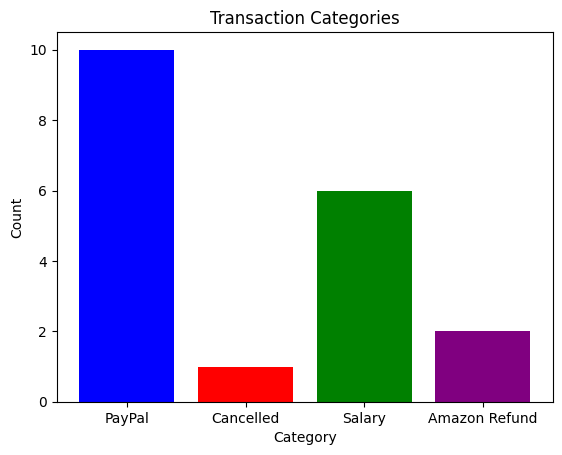

In [1]:
import json
import matplotlib.pyplot as plt

# Load transactions from the JSON file
with open("generated_transactions_with_amazon.json", "r") as json_file:
    data = json.load(json_file)

# Initialize counters for each category
paypal_count = 0
cancelled_count = 0
salary_count = 0
amazon_refund_count = 0

# Count transactions in each category
for transaction in data["Transactions"]:
    code = transaction["BankTransactionCode"]["Proprietary"]["Code"]
    if code == "PayPalPayment":
        paypal_count += 1
    elif transaction["Status"] == "CANCELLED":
        cancelled_count += 1
    elif code == "SalaryPayment":
        salary_count += 1
    elif code == "AmazonRefund":
        amazon_refund_count += 1

# Categories and their counts
categories = ["PayPal", "Cancelled", "Salary", "Amazon Refund"]
counts = [paypal_count, cancelled_count, salary_count, amazon_refund_count]

# Plot the bar chart
plt.bar(categories, counts, color=['blue', 'red', 'green', 'purple'])
plt.title("Transaction Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


/home/sam/dummyenv/my_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


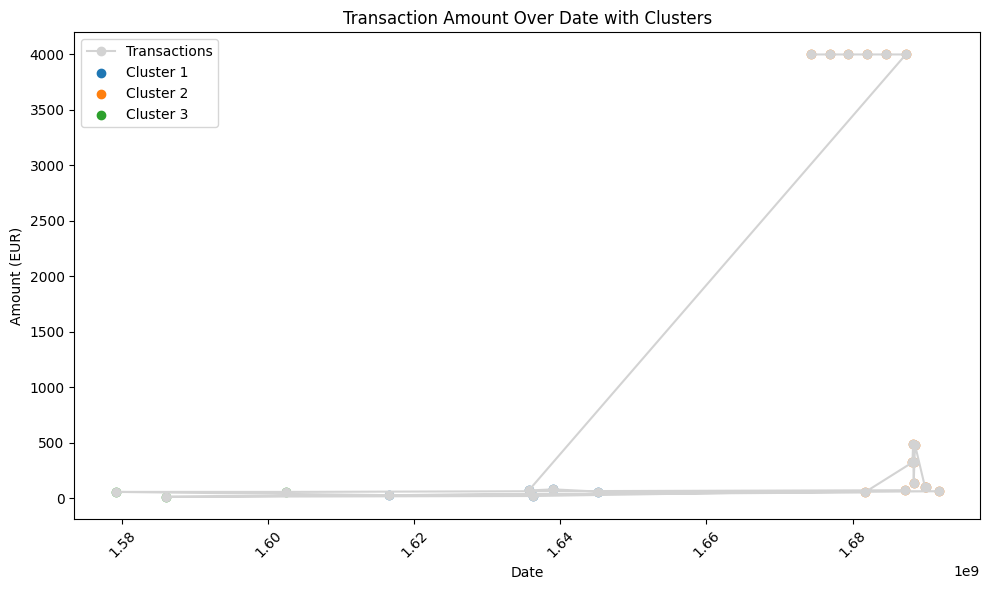

In [2]:
import json
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from datetime import datetime
import numpy as np

# Load transactions from the JSON file
with open("generated_transactions_with_amazon.json", "r") as json_file:
    data = json.load(json_file)

# Extract relevant information for clustering
dates = []
amounts = []

for transaction in data["Transactions"]:
    date_str = transaction["ValueDateTime"]
    amount = float(transaction["Amount"])

    # Convert date string to datetime object
    date = datetime.strptime(date_str, "%Y-%m-%dT%H:%M:%SZ")

    dates.append(date.timestamp())  # Convert datetime to timestamp
    amounts.append(amount)

# Combine dates and amounts into a 2D array
X = np.column_stack((dates, amounts))

# Apply K-Means clustering
n_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Plot the transaction amount over date with clusters
plt.figure(figsize=(10, 6))

# Plot transactions without clustering
plt.plot(dates, amounts, marker='o', linestyle='-', color='lightgray', label='Transactions')

# Plot transactions with clustering
for cluster in range(n_clusters):
    cluster_data = X[cluster_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker='o', label=f'Cluster {cluster + 1}')

plt.title("Transaction Amount Over Date with Clusters")
plt.xlabel("Date")
plt.ylabel("Amount (EUR)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


/home/sam/dummyenv/my_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


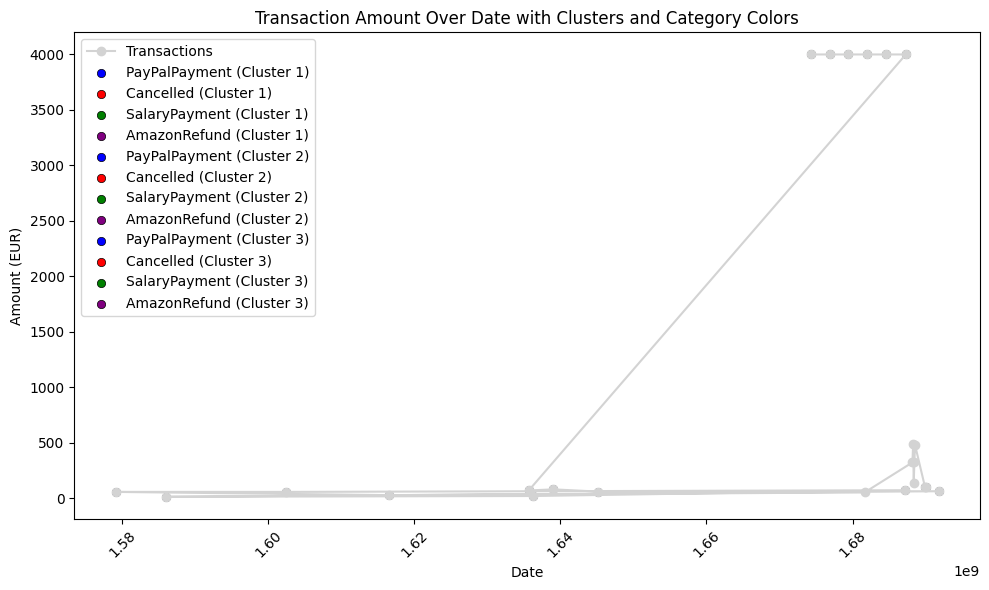

In [5]:
import json
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from datetime import datetime
import numpy as np

# Load transactions from the JSON file
with open("generated_transactions_with_amazon.json", "r") as json_file:
    data = json.load(json_file)

# Extract relevant information for clustering
dates = []
amounts = []
categories = []

for transaction in data["Transactions"]:
    date_str = transaction["ValueDateTime"]
    amount = float(transaction["Amount"])
    category = transaction["BankTransactionCode"]["Proprietary"]["Code"]

    # Convert date string to datetime object
    date = datetime.strptime(date_str, "%Y-%m-%dT%H:%M:%SZ")

    dates.append(date.timestamp())  # Convert datetime to timestamp
    amounts.append(amount)
    categories.append(category)

# Combine dates, amounts, and categories into a 2D array
X = np.column_stack((dates, amounts))

# Apply K-Means clustering
n_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Plot the transaction amount over date with clusters and different colors for categories
plt.figure(figsize=(10, 6))

# Define colors for different categories
category_colors = {'PayPalPayment': 'blue', 'Cancelled': 'red', 'SalaryPayment': 'green', 'AmazonRefund': 'purple'}

# Plot transactions without clustering
plt.plot(dates, amounts, marker='o', linestyle='-', color='lightgray', label='Transactions')

# Plot transactions with clustering and different colors for categories
for cluster in range(n_clusters):
    cluster_data = X[cluster_labels == cluster]
    cluster_categories = np.array(categories)[cluster_labels == cluster]
    for cat, color in category_colors.items():
        cat_data = cluster_data[cluster_categories == cat]
        plt.scatter(cat_data[:, 0], cat_data[:, 1], marker='o', label=f'{cat} (Cluster {cluster + 1})', edgecolors='black', linewidth=0.5, color=color)

plt.title("Transaction Amount Over Date with Clusters and Category Colors")
plt.xlabel("Date")
plt.ylabel("Amount (EUR)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



/home/sam/dummyenv/my_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


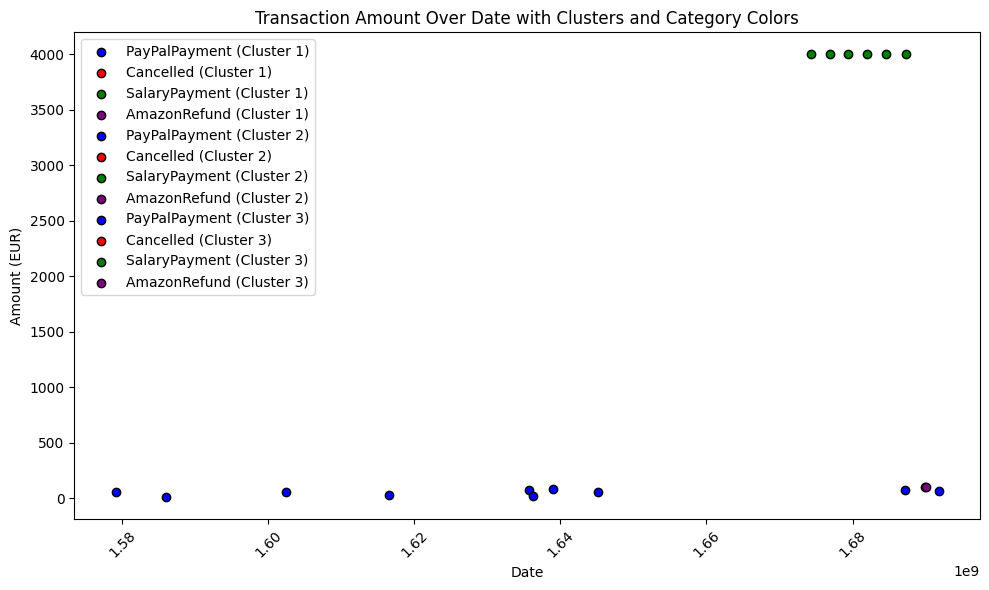

In [6]:
import json
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from datetime import datetime
import numpy as np

# Load transactions from the JSON file
with open("generated_transactions_with_amazon.json", "r") as json_file:
    data = json.load(json_file)

# Extract for clustering
dates = []
amounts = []
categories = []

for transaction in data["Transactions"]:
    date_str = transaction["ValueDateTime"]
    amount = float(transaction["Amount"])
    category = transaction["BankTransactionCode"]["Proprietary"]["Code"]

    date = datetime.strptime(date_str, "%Y-%m-%dT%H:%M:%SZ")
    dates.append(date.timestamp())  
    amounts.append(amount)
    categories.append(category)

# Combine dates, amounts, and categories into a 2D array
X = np.column_stack((dates, amounts))

# Apply K-Means clustering
n_clusters = 3 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Plot the transaction amount over date with clusters and different colors for categories
plt.figure(figsize=(10, 6))

category_colors = {'PayPalPayment': 'blue', 'Cancelled': 'red', 'SalaryPayment': 'green', 'AmazonRefund': 'purple'}

# Plot transactions with clustering 
for cluster in range(n_clusters):
    cluster_data = X[cluster_labels == cluster]
    cluster_categories = np.array(categories)[cluster_labels == cluster]
    for cat, color in category_colors.items():
        cat_data = cluster_data[cluster_categories == cat]
        plt.scatter(cat_data[:, 0], cat_data[:, 1], marker='o', label=f'{cat} (Cluster {cluster + 1})', color=color, edgecolors='black')

plt.title("Transaction Amount Over Date with Clusters and Category Colors")
plt.xlabel("Date")
plt.ylabel("Amount (EUR)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


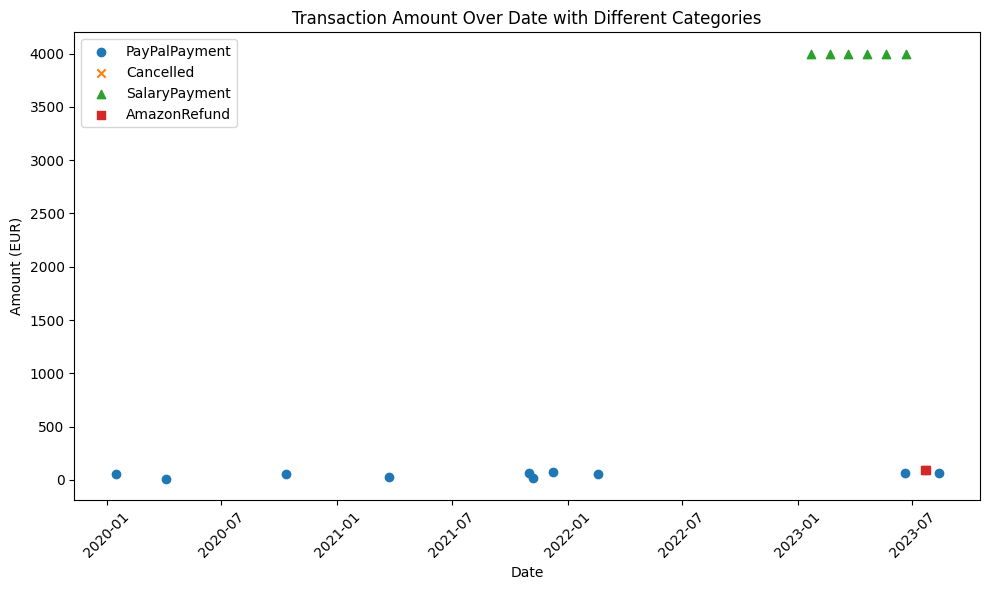

In [7]:
import json
import matplotlib.pyplot as plt
from datetime import datetime

# Load transactions from the JSON file
with open("generated_transactions_with_amazon.json", "r") as json_file:
    data = json.load(json_file)

# Extract relevant information for plotting
dates = []
amounts = []
categories = []

for transaction in data["Transactions"]:
    date_str = transaction["ValueDateTime"]
    amount = float(transaction["Amount"])
    category = transaction["BankTransactionCode"]["Proprietary"]["Code"]

    # Convert date string to datetime object
    date = datetime.strptime(date_str, "%Y-%m-%dT%H:%M:%SZ")

    dates.append(date)
    amounts.append(amount)
    categories.append(category)

# Plot transactions with different markers/colors for each category
plt.figure(figsize=(10, 6))

category_markers = {
    'PayPalPayment': 'o',
    'Cancelled': 'x',
    'SalaryPayment': '^',
    'AmazonRefund': 's',
}

for cat, marker in category_markers.items():
    cat_dates = [date for date, cat_type in zip(dates, categories) if cat_type == cat]
    cat_amounts = [amount for amount, cat_type in zip(amounts, categories) if cat_type == cat]

    plt.scatter(cat_dates, cat_amounts, marker=marker, label=cat)

plt.title("Transaction Amount Over Date with Different Categories")
plt.xlabel("Date")
plt.ylabel("Amount (EUR)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


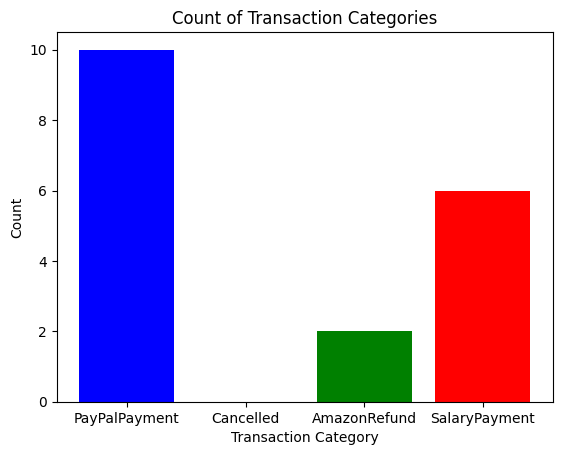

In [11]:
import json
import matplotlib.pyplot as plt

with open("generated_transactions_with_amazon.json", "r") as json_file:
    data = json.load(json_file)

# Extract relevant information for plotting
categories = [transaction["BankTransactionCode"]["Proprietary"]["Code"] for transaction in data["Transactions"]]

# Create counters for each category
category_counts = {"PayPalPayment": 0, "Cancelled": 0, "AmazonRefund": 0, "SalaryPayment": 0}

# Iterate through transactions and update counters
for category in categories:
    if category in category_counts:
        category_counts[category] += 1

# Plot a bar diagram
plt.bar(category_counts.keys(), category_counts.values(), color=['blue', 'orange', 'green', 'red'])
plt.title("Count of Transaction Categories")
plt.xlabel("Transaction Category")
plt.ylabel("Count")
plt.show()



In [6]:
import json

with open("transactions.json", "r") as transactions_file:
    transactions_data = json.load(transactions_file)

with open("account_info.json", "r") as account_info_file:
    account_info = json.load(account_info_file)

trust_index = 0

# Check salary income for past 6 months
salary_transactions = [transaction for transaction in transactions_data["Transactions"] if
                        transaction["BankTransactionCode"]["Proprietary"]["Code"] == "SalaryPayment"]
if len(salary_transactions) == 6:
    trust_index += 11
print(f"Salary Score: {11 if len(salary_transactions) == 6 else 0}")

# Check transactions using PayPal
paypal_transactions = [transaction for transaction in transactions_data["Transactions"] if
                       transaction["BankTransactionCode"]["Proprietary"]["Code"] == "PayPalPayment"]
paypal_percentage = (len(paypal_transactions) / len(transactions_data["Transactions"])) * 100
if paypal_percentage <= 10:
    trust_index += 11
    print("PayPal Transactions:")
    for transaction in paypal_transactions:
        print(f"Amount: {transaction['Amount']}, Code: {transaction['BankTransactionCode']['Proprietary']['Code']}, "
              f"Date: {transaction['ValueDateTime']}")
print(f"Cancelled Score: {11 if paypal_percentage <= 10 else 0}")

# Cancelled transactions checks
cancelled_transactions = [transaction for transaction in transactions_data["Transactions"] if
                           transaction["Status"] == "CANCELLED"]
cancelled_percentage = (len(cancelled_transactions) / len(transactions_data["Transactions"])) * 100
if cancelled_percentage <= 10:
    trust_index += 11
    #print("Cancelled Transactions:")
    for transaction in cancelled_transactions:
        print(f"Amount: {transaction['Amount']}, Code: {transaction['BankTransactionCode']['Proprietary']['Code']}, "
              f"Date: {transaction['ValueDateTime']}")
print(f"PayPal Score: {11 if cancelled_percentage <= 10 else 0}")

# Amazon transactions and debits to Amazon not greater than credits
amazon_transactions = [transaction for transaction in transactions_data["Transactions"] if
                       transaction["BankTransactionCode"]["Proprietary"]["Code"] == "AmazonPayment" or
                       transaction["BankTransactionCode"]["Proprietary"]["Code"] == "AmazonRefund"]
amazon_debits = sum(float(transaction["Amount"]) for transaction in amazon_transactions if
                    transaction["CreditDebitIndicator"] == "DBIT")
amazon_credits = sum(float(transaction["Amount"]) for transaction in amazon_transactions if
                     transaction["CreditDebitIndicator"] == "CRDT")
if amazon_credits <= amazon_debits:
    trust_index += 11
    print("Amazon Transactions:")
    for transaction in amazon_transactions:
        print(f"Amount: {transaction['Amount']}, Code: {transaction['BankTransactionCode']['Proprietary']['Code']}, "
              f"Date: {transaction['ValueDateTime']}")
print(f"Refund History Score: {11 if amazon_credits <= amazon_debits else 0}")

shopper_name = account_info["Name"]
if shopper_name == "Test Mustermann1":
    trust_index += 33
print(f"User Identity Score: {33 if shopper_name == 'Test Mustermann1' else 0}")

# Print the overall trust index
#print("\nSalary Transactions:")
#for transaction in salary_transactions:
   # print(f"Date: {transaction['ValueDateTime']}, Proprietary Code: {transaction['BankTransactionCode']['Proprietary']['Code']}, Amount: {transaction['Amount']}")

#print("\nPayPal Transactions:")
#for transaction in paypal_transactions:
    #print(f"Date: {transaction['ValueDateTime']}, Proprietary Code: {transaction['BankTransactionCode']['Proprietary']['Code']}, Amount: {transaction['Amount']}")

# Trust index does not exceed 99
trust_index = min(trust_index, 99)
print(f"Trust Index: {trust_index}%")


Salary Score: 11
Cancelled Score: 0
PayPal Score: 11
Refund History Score: 0
User Identity Score: 33
Trust Index: 55%


In [8]:
import uuid

psuid = str(uuid.uuid4())
print(psuid)


28127141-9276-4701-962b-6ebc03192ea9
